# Chapter 2

In [2]:
import numpy as np
import math
import statistics as stats
import scipy.stats as scistats
import matplotlib.pyplot as plt
import os
from pandas import read_table, read_csv
from netCDF4 import Dataset as ds
# These import statements bring in the python packages we'll need. 

plt.rcParams['figure.figsize'] = (12, 12)

In [2]:
def numeric_To_Named(stri):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    mon = months[int(stri[5:7])-1]
    day = int(stri[8:])
    return str(day) + " " + mon

In [3]:
precipData = np.array(read_csv("2041919.csv", usecols=["DATE","PRCP"]))
date = precipData[:, 0]
date = [numeric_To_Named(i) for i in date]
precip = precipData[:,1]
w = np.array([5 if i > .2 else -10 for i in precip])
d = np.array([0 if i <= .2 else -10 for i in precip])
temp = precip[-1]
precip[1:] = precip[:-1]
precip[0] = temp

## Figure 2.1

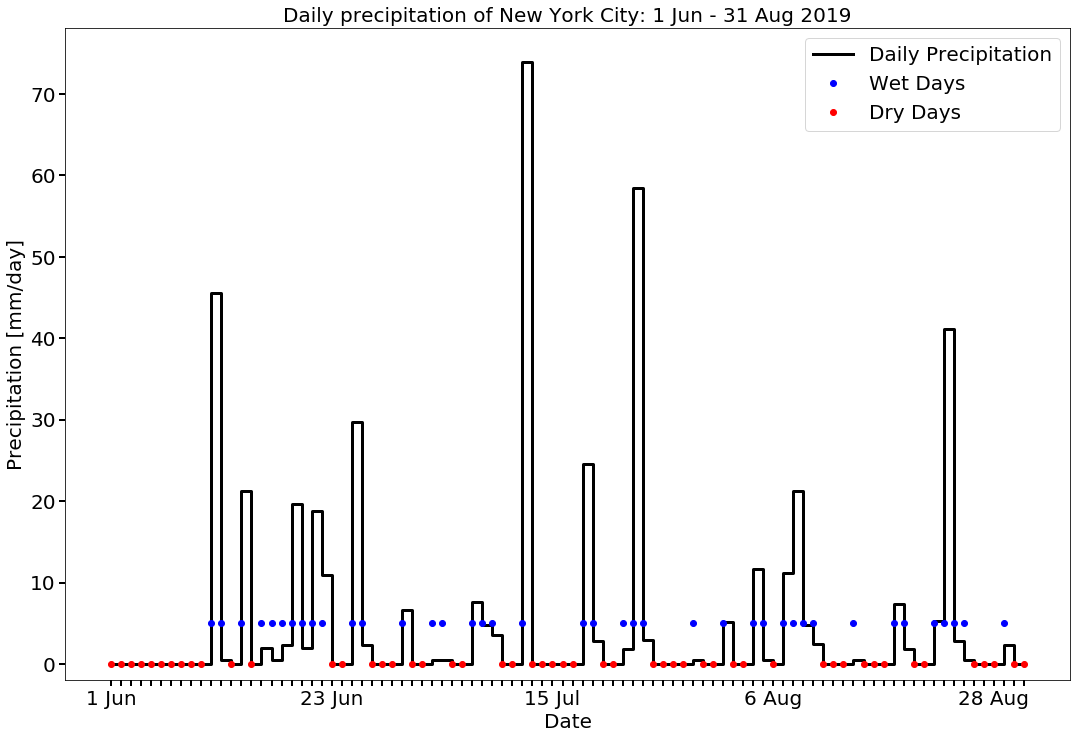

In [4]:
plt.figure(figsize=(18,12))
plt.title(r"Daily precipitation of New York City: 1 Jun - 31 Aug 2019", size = 20)
kwargs = {'drawstyle' : 'steps'}
plt.plot(date, precip, 'black', linewidth = 3, label="Daily Precipitation", **kwargs);
plt.plot(date, w, 'bo', label="Wet Days")
plt.plot(date, d, 'ro', label="Dry Days")
plt.xlabel("Date", size = 20)
plt.ylabel(r"Precipitation [mm/day]", size = 20);
plt.tick_params(length=6, width=2, labelsize=20);
plt.ylim(-2,)
plt.legend(loc = 'upper right', prop={'size':20});
ax = plt.gca()
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::22]))
for label in temp:
    label.set_visible(False)

plt.savefig("NYCPrecipitation.jpg");


## Figure 2.2

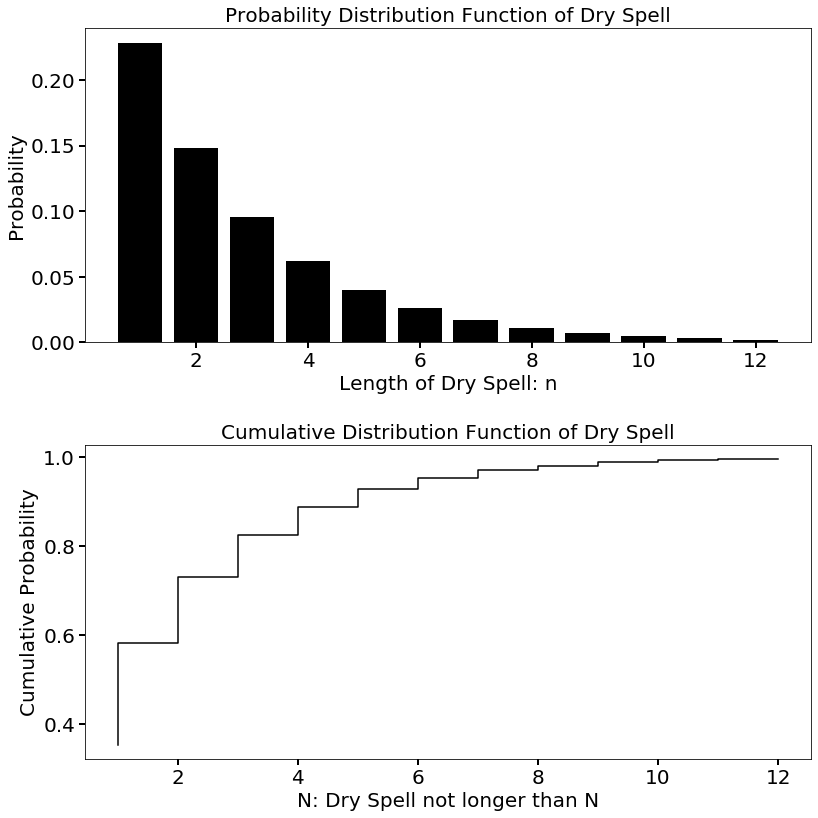

In [5]:
p = 0.6471
n = np.array(range(1,13))
pdfn = (1 - p)*p ** n
cdfn = 1 - p ** n

fig, ax = plt.subplots(2,1, figsize=(12,12))

ax[0].bar(n, pdfn, color='k')
ax[0].set_title("Probability Distribution Function of Dry Spell", size = 20)
ax[0].set_xlabel("Length of Dry Spell: n", size=20)
ax[0].set_ylabel("Probability",size=20)
ax[0].tick_params(length=6, width=2, labelsize=20);

ax[1].plot(n, cdfn, 'k', **kwargs)
ax[1].set_title("Cumulative Distribution Function of Dry Spell", size = 20)
ax[1].set_xlabel("N: Dry Spell not longer than N", size=20)
ax[1].set_ylabel("Cumulative Probability", size=20)
ax[1].tick_params(length=6, width=2, labelsize=20);
fig.tight_layout(pad=3)
plt.savefig("DrySpellProb.jpg");


In [6]:
def binom_prob(n, p):
    x = np.array(range(n+1))
    return np.array([binom(n, i)*(p**i)*(1-p)**(n - i) for i in x])

def binom(n, k):
    if(k == 1):
        return n
    
    if(n == k or k == 0):
        return 1
    
    return binom(n - 1, k) + binom(n - 1, k - 1)

In [7]:
n = 20
x = np.array(range(n + 1))
pdfdx = binom_prob(n, .3)
cdfdx = np.array([np.sum(pdfdx[:i]) for i in range(n+1)])

## Figure 2.3

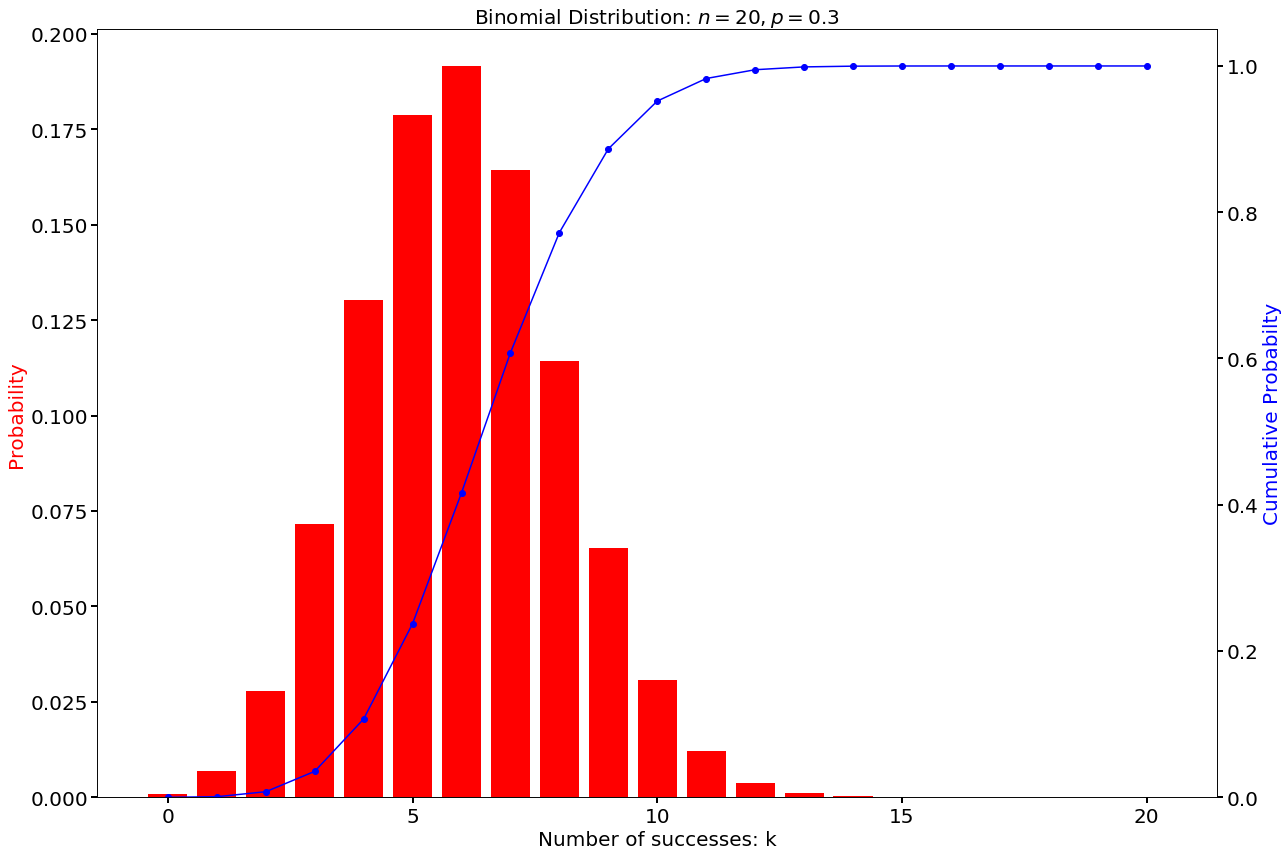

In [8]:
fig, ax1 = plt.subplots(figsize=(18,12))

ax1.bar(x, pdfdx, color='r');
ax1.set_xlabel("Number of successes: k", size = 20)
ax1.set_ylabel("Probability", size = 20, color = 'r')
ax1.set_title("Binomial Distribution: $n=20, p = 0.3$", size = 20)
ax1.tick_params(length=6, width=2, labelsize=20);

ax2 = ax1.twinx()

ax2.plot(x, cdfdx, 'bo-');
ax2.set_ylabel("Cumulative Probabilty", size = 20, color='b')
ax2.tick_params(length=6, width=2, labelsize=20);
ax2.set_ylim(0,)
plt.savefig("BinomDist.jpg");

fig.tight_layout()

In [9]:
dist = scistats.norm(0,1)
x = np.linspace(-5,5,101)
y1 = dist.pdf(x)
y2 = dist.cdf(x)

## Figure 2.4

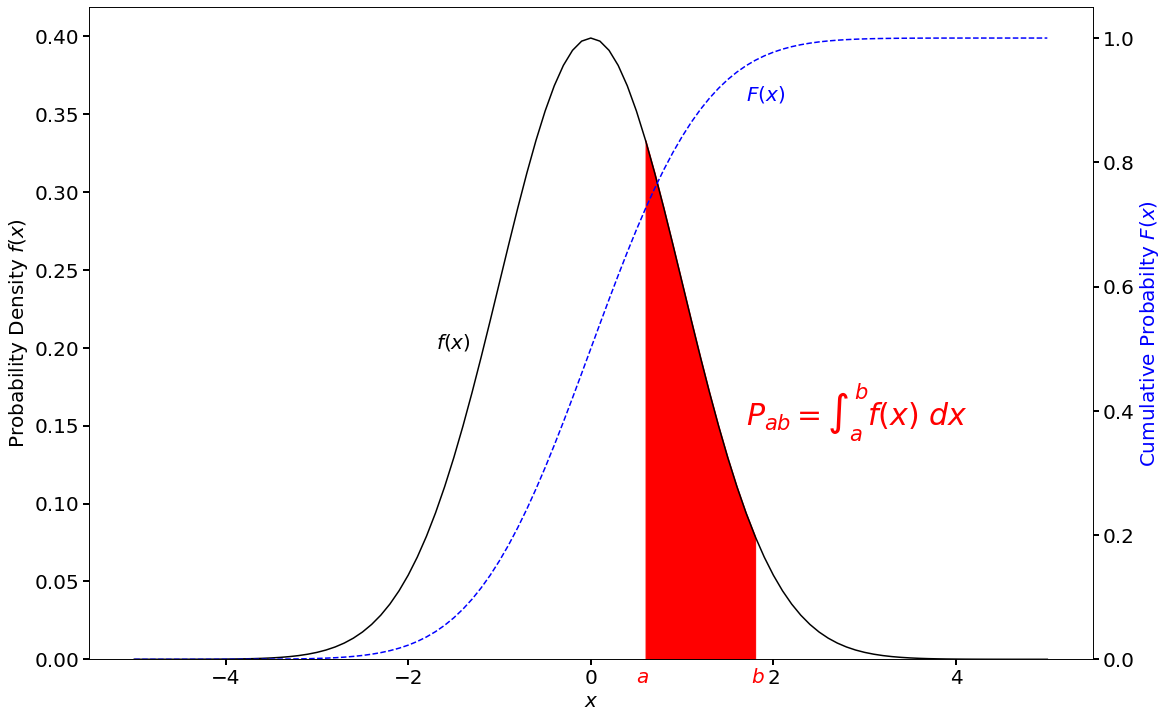

In [10]:
fig, ax1 = plt.subplots(figsize=(18,12))

interval = np.array([True if i > .5 and i < 1.9 else False for i in x])

ax1.plot(x, y1, 'k')
ax1.fill_between(x, np.zeros(x.size), y1, where= interval, color ='red')
ax1.set_xlabel("$x$", size = 20)
ax1.set_ylabel("Probability Density $f(x)$", size = 20)
ax1.tick_params(length=6, width=2, labelsize=20);
ax1.text(-1.7,.2, "$f(x)$", fontsize = 20)
ax1.text(1.7,.15, "$P_{ab} = \int_a^b f(x)\ dx$", fontsize = 30, color ='red')
ax1.text(.5,-.015, "$a$", fontsize = 20, color = 'red')
ax1.text(1.75,-.015, "$b$", fontsize = 20, color ='red')
ax1.set_ylim(0,)
ax2 = ax1.twinx()

ax2.plot(x, y2, 'b--')
ax2.set_ylabel("Cumulative Probabilty $F(x)$", size = 20, color ='b')
ax2.tick_params(length=6, width=2, labelsize=20);
ax2.text(1.7,.9, "$F(x)$", fontsize=20, color = 'blue')
ax2.set_ylim(0,)
plt.savefig("NormDist.jpg");

## Figure 2.5

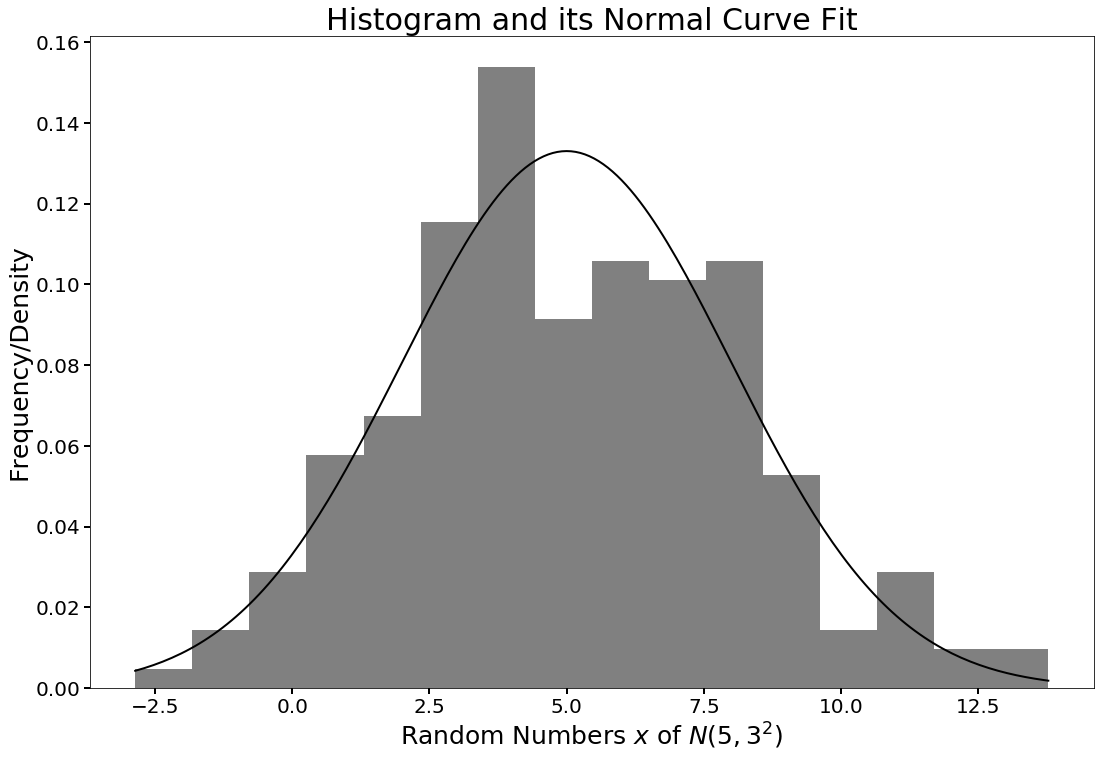

In [25]:
x = np.random.normal(5, 3, 200)
points = np.linspace(x.min(), x.max(), 200)

fig, ax1 = plt.subplots(figsize=(18,12))

ax1.hist(x, bins=16, density = True, color = 'gray');
ax1.plot(points, scistats.norm.pdf(points, 5, 3), color = 'k', linewidth = 2);
ax1.tick_params(length=6, width=2, labelsize=20);
ax1.set_title("Histogram and its Normal Curve Fit", size = 30);
ax1.set_xlabel("Random Numbers $x$ of $N(5,3^2)$", size = 25);
ax1.set_ylabel("Frequency/Density", size = 25);

## Figure 2.6

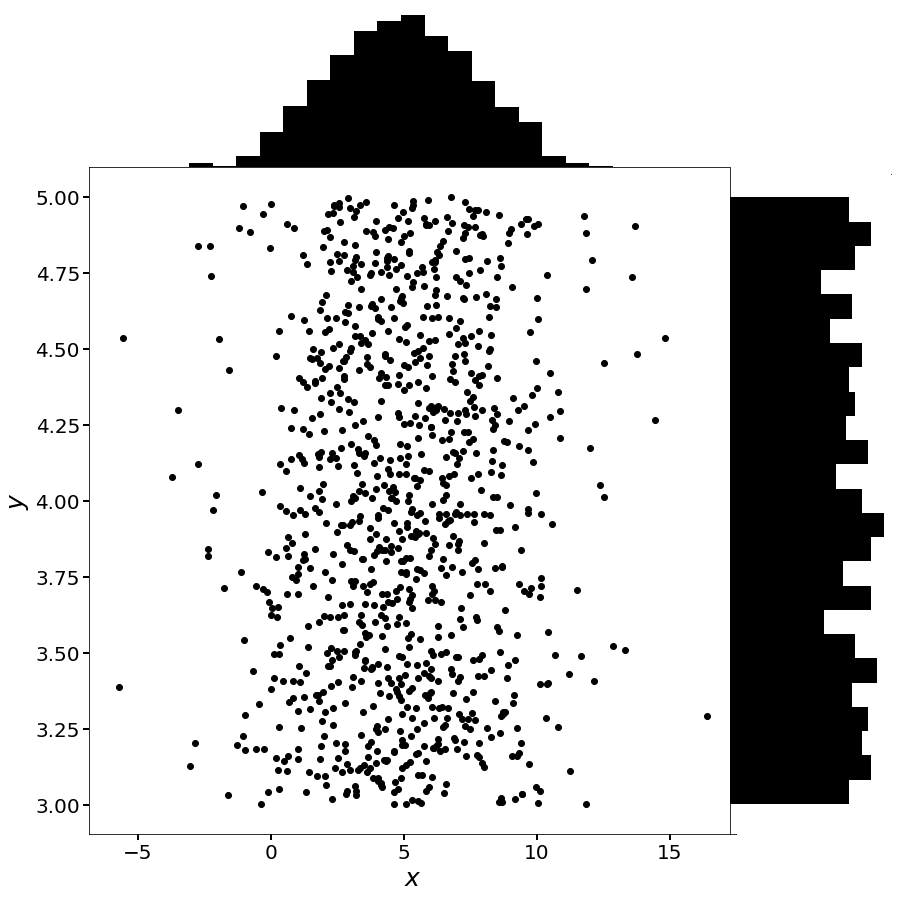

In [3]:
fig, ax = plt.subplots(2,2, gridspec_kw={'width_ratios': [4, 1], 'height_ratios': [1,4]}, figsize=(12,12))

x = np.random.normal(5, 3, 1000)
y = np.random.uniform(5, 3, 1000)

ax[0,0].hist(x, color = 'k', bins =25, density=True)

ax[1,1].hist(y, color = 'k', bins =25, density=True, orientation=u'horizontal', histtype='bar')

ax[1,0].plot(x,y, 'ko', linewidth = 2);
ax[1,0].set_xlabel("$x$", size = 25);
ax[1,0].set_ylabel("$y$", size = 25);
ax[1,0].tick_params(length=6, width=2, labelsize=20);

ax[0,0].axes.get_xaxis().set_visible(False)
ax[0,0].axes.get_yaxis().set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)


ax[1,1].axes.get_xaxis().set_visible(False)
ax[1,1].axes.get_yaxis().set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['bottom'].set_visible(False)


ax[0,1].axes.get_xaxis().set_visible(False)
ax[0,1].axes.get_yaxis().set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['left'].set_visible(False)


fig.tight_layout(pad=-1)


plt.savefig("NormalVsUniformDist.jpg", bbox_inches='tight')

## Figure 2.7

In [20]:
x = np.arange(21)
pois = np.array([(np.exp(-5)*5**i)/np.math.factorial(i) for i in x])
cdfdx = np.array([np.sum(pois[:i]) for i in range(x.size)])

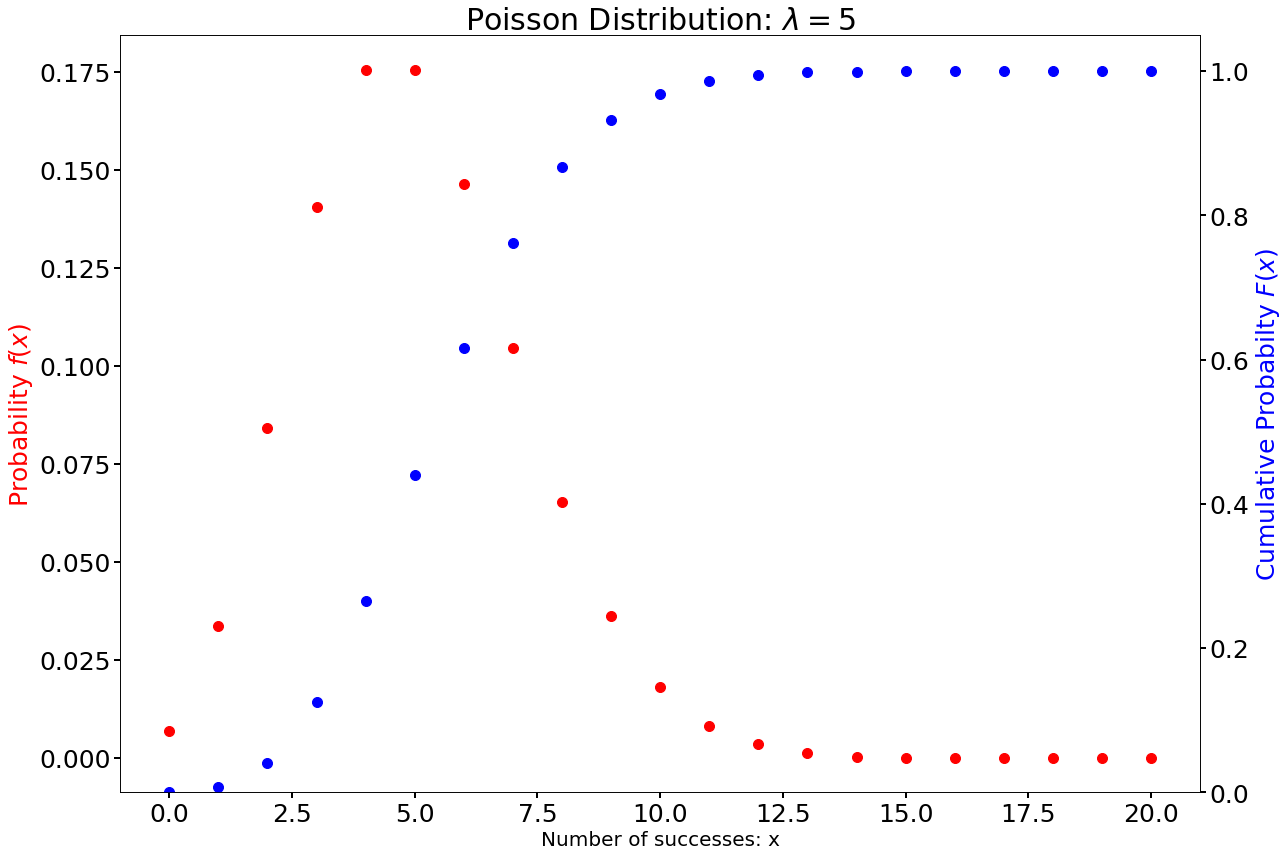

In [21]:
fig, ax1 = plt.subplots(figsize=(18,12))

ax1.plot(x,pois,'ro', ms = 10);
ax1.set_xlabel("Number of successes: x", size = 20)
ax1.set_ylabel("Probability $f(x)$", size = 25, color = 'r')
ax1.set_title("Poisson Distribution: $\lambda = 5$", size = 30)
ax1.tick_params(length=6, width=2, labelsize=25);

ax2 = ax1.twinx()

ax2.plot(x, cdfdx, 'bo', ms = 10);
ax2.set_ylabel("Cumulative Probabilty $F(x)$", size = 25, color='b')
ax2.tick_params(length=6, width=2, labelsize=25);
ax2.set_ylim(0,)
plt.savefig("PoissonDist.jpg");

fig.tight_layout()

## Figure 2.8

In [27]:
x = np.linspace(0, 20, 201)
pInv = 1/np.pi
yNorm = np.array([pInv*np.exp(-((i - 10)**2)*pInv) for i in x])
yCauchy = np.array([1/(np.pi*(1+(i - 10)**2)) for i in x])

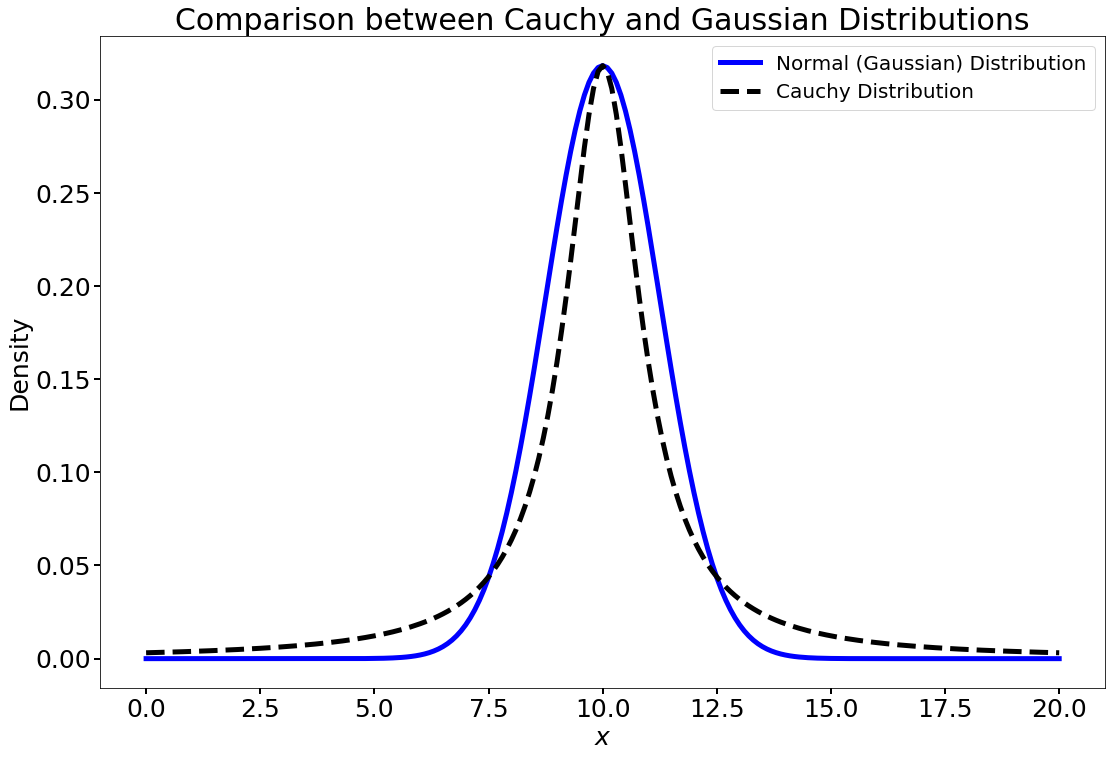

In [28]:
fig, ax = plt.subplots(figsize=(18,12))

ax.plot(x, yNorm, 'b-', label="Normal (Gaussian) Distribution", linewidth=5)
ax.plot(x, yCauchy, 'k--', label="Cauchy Distribution", linewidth=5)
ax.set_xlabel("$x$", size = 25)
ax.set_ylabel("Density", size = 25)
ax.tick_params(length=6, width=2, labelsize=25);
ax.set_title("Comparison between Cauchy and Gaussian Distributions", size = 30);
ax.legend(loc = 'best', prop={'size':20});

plt.savefig("CauchyVsGaussianDist.jpg");

## Figure 2.9

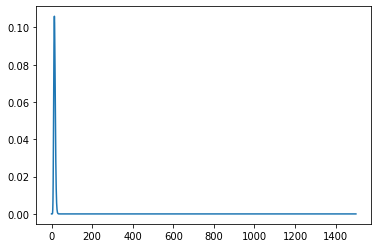

In [31]:
x = np.linspace(0,1500,1500)
gpdf = scistats.gamma.pdf(x, 15)
plt.plot(x,gpdf)